# [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection)

### Preprocess

##### Data
A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label. This outer region is provided to enable fully-convolutional models that do not use zero-padding, to ensure consistent behavior when applied to a whole-slide image.

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

import glob
from skimage.color import rgb2lab
from collections import namedtuple

%matplotlib inline

In [2]:
LABEL_PATH = "./datas/train_labels.csv"
DATA_PATH = "./datas/train"
N_CLASS = 2

In [3]:
train_label = pd.read_csv(LABEL_PATH, header=None)
print(train_label)
print(type(train_label))

                                               0      1
0                                             id  label
1       f38a6374c348f90b587e046aac6079959adf3835      0
2       c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
3       755db6279dae599ebb4d39a9123cce439965282d      0
4       bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
...                                          ...    ...
220021  53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6      0
220022  d4b854fe38b07fe2831ad73892b3cec877689576      1
220023  3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75      0
220024  f129691c13433f66e1e0671ff1fe80944816f5a2      0
220025  a81f84895ddcd522302ddf34be02eb1b3e5af1cb      1

[220026 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [4]:
label = train_label[1:][1]
label

1         0
2         1
3         0
4         0
5         0
         ..
220021    0
220022    1
220023    0
220024    0
220025    1
Name: 1, Length: 220025, dtype: object

In [5]:
label_list = list(label)
label_list

['0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0'

In [6]:
y = list()

# one-hot
for i in range(len(label_list)):
    if label_list[i] == '0':
        y.append([1, 0])
    else:
        y.append([0, 1])

y

[[1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 

In [7]:
train_id = train_label[1:][0]
train_id

1         f38a6374c348f90b587e046aac6079959adf3835
2         c18f2d887b7ae4f6742ee445113fa1aef383ed77
3         755db6279dae599ebb4d39a9123cce439965282d
4         bc3f0c64fb968ff4a8bd33af6971ecae77c75e08
5         068aba587a4950175d04c680d38943fd488d6a9d
                            ...                   
220021    53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6
220022    d4b854fe38b07fe2831ad73892b3cec877689576
220023    3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75
220024    f129691c13433f66e1e0671ff1fe80944816f5a2
220025    a81f84895ddcd522302ddf34be02eb1b3e5af1cb
Name: 0, Length: 220025, dtype: object

In [8]:
train_id_list = list(train_id)

In [9]:
train_id_list[0]

'f38a6374c348f90b587e046aac6079959adf3835'

In [19]:
img = Image.open(DATA_PATH + "/" + train_id_list[0] + ".tif")
img.show()

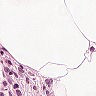

In [20]:
img

In [21]:
w, h = img.size
print(w, h)

96 96


In [39]:
def im_trim(im, train_id):
    x, y = 32, 32
    w, h = 32, 32
    crop_img = im.crop((x, y, x+w, y+h))
    crop_img.save(DATA_PATH + "set/" + train_id + ".ppm")

In [41]:
# run only once
# for i in range(len(train_id_list)):
#     im = Image.open(DATA_PATH + "/" + train_id_list[i] + ".tif")
#     im_trim(im, train_id_list[i])

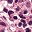

In [42]:
cropped_img = Image.open(DATA_PATH + "set/" + train_id_list[-1] + ".ppm")
cropped_img.show()

cropped_img

In [43]:
cropped_img.size

(32, 32)

In [44]:
PREPRO_DATA_PATH = DATA_PATH + "set/"

In [45]:
len(train_id_list)

220025

In [46]:
np.random.seed(101)

In [47]:
Dataset = namedtuple('Dataset', ['X', 'y'])

In [48]:
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

In [49]:
def read_dataset_ppm(rootpath, n_labels):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = PREPRO_DATA_PATH
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img / 255.0)[:,:,0]
            
            label = np.zeros((n_labels, ), dtype=np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
        
    return Dataset(X = to_tf_format(images).astype(np.float32),
                  y = np.matrix(labels).astype(np.float32))

dataset = read_dataset_ppm(PREPRO_DATA_PATH, N_CLASS)
print(dataset.X.shape)
print(dataset.y.shape)

(440050, 32, 32, 1)
(440050, 2)


[[1. 0.]]


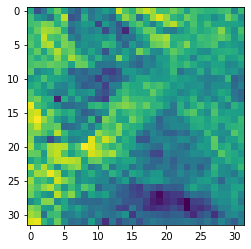

In [54]:
plt.imshow(dataset.X[0, :, :, :].reshape((32,32)))
print(dataset.y[0, :])

[[0. 1.]]


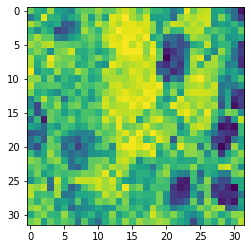

In [55]:
plt.imshow(dataset.X[-1, :, :, :].reshape((32, 32)))
print(dataset.y[-1, :])

## Modeling

Convolution - MaxPool - Convolution - MaxPool - Flatten - Fuuly Connected - Softmax

In [59]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=101)
X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :] # validation
y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :] # validation

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(330037, 32, 32, 1) (330037, 2)
(110013, 32, 32, 1) (110013, 2)


In [62]:
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
        
    for k in range(int(np.ceil(n_samples/batch_size))):
        from_idx = k*batch_size
        to_idx = (k+1)*batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]

In [64]:
for mb in minibatcher(X_train, y_train, 20000, True):
    print(mb[0].shape, mb[1].shape)

(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(20000, 32, 32, 1) (20000, 2)
(10037, 32, 32, 1) (10037, 2)


In [65]:
def fc_no_activation_layer(in_tensors, n_units):
    w = tf.get_variable('fc_W',
                       [in_tensors.get_shape()[1], n_units],
                       tf.float32,
                       tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_b',
                       [n_units, ],
                       tf.float32,
                       tf.constant_initializer(0.0))
    return tf.matmul(in_tensors, 2) + b

In [66]:
# Fully Connected Layer
def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units)) # activation function : leaky ReLU

In [67]:
# Convolution Layer
def conv_layer(in_tensors, kernel_size, n_units):
    w = tf.get_variable('conv_W',
                       [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units],
                       tf.float32,
                       tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('conv_B',
                       [n_units, ],
                       tf.float32,
                       tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, w, [1, 1, 1, 1], 'SAME') + b)

In [68]:
# MaxPool Layer
def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], 'SAME')

In [69]:
# Dropout
def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda: tf.nn.dropout(in_tensors, keep_proba), lambda: in_tensors)

___2-dim Conv___ 5x5 32 filters

___2-dim Conv___ 5x5 64 filters

___Flattening Layer___

___Fully Connected Layer___ 1024 units

___Dropout___ 40%

___Fully Connected Layer without Activation Function___

___Softmax activation function___ output layer

In [90]:
def model(in_tensors, is_training):
    # first layout : 5x5, 2-dim Conv, 32 filters, 2x Maxpool, 20% Dropout
#     with tf.variable_scope('l1'):
    with tf.VariableScope('l1'):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
        
    # second layout : 5x5, 2-dim Conv, 32 filters, 2x Maxpool, 20% Dropout
#     with tf.variable_scope('l2'):
    with tf.VariableScope('l2'):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
        
#     with tf.variable_scope('flatten'):
    with tf.VariableScope('flatten'):
        l2_out_flat = tf.layers.flatten(l2_out)
        
    # FC layer, 1024 neuron, 40% Droput
#     with tf.variable_scope('l3'):
    with tf.VariableScope('l3'):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
        
    # result
#     with tf.variable_scope('out'):
    with tf.VariableScope('out'):
        out_tensors = tc_no_activation_layer(l3_out, N_CLASS)
        
        
    return out_tensors

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):
    # tf 1
#     in_X_tensors_batch = tf.placeholder(tf.float32, shape = (None, 32, 32, 1))
#     in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_CLASS))
#     is_training = tf.placeholder(tf.bool)
    
    # tf 2
    in_X_tensors_batch = tf.Variable(tf.ones(shape=(32, 32, 1)))
    in_y_tensors_batch= tf.Variable(tf.zeros(shape=(N_CLASS)))
    is_training = tf.Variable(bool)
    
    logits = model(in_X_tensors_batch, is_training)
    out_y_pred = tf.nn.softmax(logits)
    loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=in_y_tensors_batch)
    loss = tf.reduce_mean(loss_score)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        
        for epoch in range(max_epochs):
            print("Epoch=", epoch)
            tf_score = []
            
            for mb in minibatcher(X_train, y_train, batch_size, shuffle = True):
                tf_output = session.run([optimizer, loss],
                                       feed_dict = {in_X_tensors_batch : mb[0],
                                                   in_y_tensors_batch : mb[1],
                                                   is_training : True})
                
                tf_score.append(tf_output[1])
                
            print("train_loss_score=", np.mean(tf_score))
    
        print("\nTEST SET PERFORMANCE")
        y_test_pred, test_loss = session.run([out_y_pred, loss],
                                            feed_dict = {in_X_tensors_batch : X_test,
                                                        in_y_tensors_batch : y_test,
                                                        is_training : False})

        print("test_loss_score=", test_loss)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))

        cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.tight_layout()
        plt.show()

        # wrong classified smaple
        plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
    tf.reset_default_graph()

In [92]:
train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)

AttributeError: module 'tensorflow' has no attribute 'VariableScope'